In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head(5) # first 5 rows of the data file 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape # understanding the rows and columns 

(7043, 21)

In [5]:
df.info() # understanding data types and checking for null numbers 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum() # checking missing values we have in each of the columns

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')# Convering totalcharges to numeric it will revel some rows where totalcharges is nan
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.drop('customerID',axis=1,inplace=True)

In [9]:
# Feature 1: AverageMonthlyCharges = TotalCharges / tenure
df['AverageMonthlyCharges'] = df['TotalCharges'] / df['tenure']
df['AverageMonthlyCharges'] = df['AverageMonthlyCharges'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Feature 2: TenureGroup = Categorized tenure
def tenure_group(tenure):
    if tenure <= 12:
        return '0–1 year'
    elif tenure <= 24:
        return '1–2 years'
    elif tenure <= 48:
        return '2–4 years'
    elif tenure <= 60:
        return '4–5 years'
    else:
        return '5–6 years'

df['TenureGroup'] = df['tenure'].apply(tenure_group)

In [10]:
df = df.dropna(subset=['TotalCharges'])
df.isnull().sum()

gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
Churn                    0
AverageMonthlyCharges    0
TenureGroup              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7032 non-null   object 
 1   SeniorCitizen          7032 non-null   int64  
 2   Partner                7032 non-null   object 
 3   Dependents             7032 non-null   object 
 4   tenure                 7032 non-null   int64  
 5   PhoneService           7032 non-null   object 
 6   MultipleLines          7032 non-null   object 
 7   InternetService        7032 non-null   object 
 8   OnlineSecurity         7032 non-null   object 
 9   OnlineBackup           7032 non-null   object 
 10  DeviceProtection       7032 non-null   object 
 11  TechSupport            7032 non-null   object 
 12  StreamingTV            7032 non-null   object 
 13  StreamingMovies        7032 non-null   object 
 14  Contract               7032 non-null   object 
 15  Paperless

In [12]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageMonthlyCharges,TenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000,0–1 year
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529,2–4 years
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000,0–1 year
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,2–4 years
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000,0–1 year


In [13]:
df.shape

(7032, 22)

In [14]:
df.columns=df.columns.str.strip()

In [15]:
# SQL
from sqlalchemy import create_engine
username ='root'
password ='Fazman150'
host ='Localhost'
port ='3306'
database ='data'
table_name = 'cleaned_telco_data'
# Create Sqlaclemy engine
engine = create_engine(f'mysql+mysqlconnector://{"root"}:{"Fazman150"}@{"Localhost"}:{"3306"}/{"data"}')
# Load the dataframe into MYSQL
df.to_sql(name=table_name,con=engine,index=False, if_exists='replace')
print("Data saved sucessfully to MySQL!")

Data saved sucessfully to MySQL!


In [16]:
# Map gender to 0/1
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Map Yes/No binary columns to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

C:\Users\DELL\AppData\Local\Temp\ipykernel_9772\2102128681.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


In [17]:
# Save target column
y = df['Churn']

# Drop target from features
X = df.drop('Churn', axis=1)

In [18]:
# One-hot encode remaining categorical columns
X = pd.get_dummies(X, drop_first=True)

In [19]:
column_names = X.columns

In [20]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=column_names)

In [21]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train,columns=column_names)

In [22]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
logistic_model = LogisticRegression(class_weight='balanced',max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [23]:
# Predict on test set
y_pred = logistic_model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7320540156361052
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

Confusion Matrix:
 [[732 301]
 [ 76 298]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

# Train and store results
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.7896
Random Forest Accuracy: 0.7861
Decision Tree Accuracy: 0.7136
SVM Accuracy: 0.7846
Naive Bayes Accuracy: 0.6603
KNN Accuracy: 0.7491


In [27]:
# Show model accuracy comparison
import pandas as pd

results_df = pd.DataFrame.from_dict(model_results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

                     Accuracy
Logistic Regression  0.789623
Random Forest        0.786070
SVM                  0.784648
KNN                  0.749112
Decision Tree        0.713575
Naive Bayes          0.660270


In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# Evaluate each model using 5-fold cross-validation
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = np.mean(scores)
    print(f"{name} CV Accuracy: {np.mean(scores):.4f}")

Logistic Regression CV Accuracy: 0.8053
Random Forest CV Accuracy: 0.7925
Decision Tree CV Accuracy: 0.7305
SVM CV Accuracy: 0.8002
Naive Bayes CV Accuracy: 0.6769
KNN CV Accuracy: 0.7655


In [30]:
# Interpreting the logistic Model
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': np.round(logistic_model.coef_[0], 4)
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df)

                                  Feature  Coefficient
12            InternetService_Fiber optic       0.7261
8                            TotalCharges       0.3490
25                    StreamingMovies_Yes       0.2652
23                        StreamingTV_Yes       0.2633
11                      MultipleLines_Yes       0.1795
34                  TenureGroup_5–6 years       0.1526
33                  TenureGroup_4–5 years       0.1378
29         PaymentMethod_Electronic check       0.1339
6                        PaperlessBilling       0.1252
1                           SeniorCitizen       0.1023
19                   DeviceProtection_Yes       0.0616
2                                 Partner       0.0253
17                       OnlineBackup_Yes       0.0167
10         MultipleLines_No phone service       0.0001
5                            PhoneService      -0.0001
0                                  gender      -0.0060
28  PaymentMethod_Credit card (automatic)      -0.0353
30        

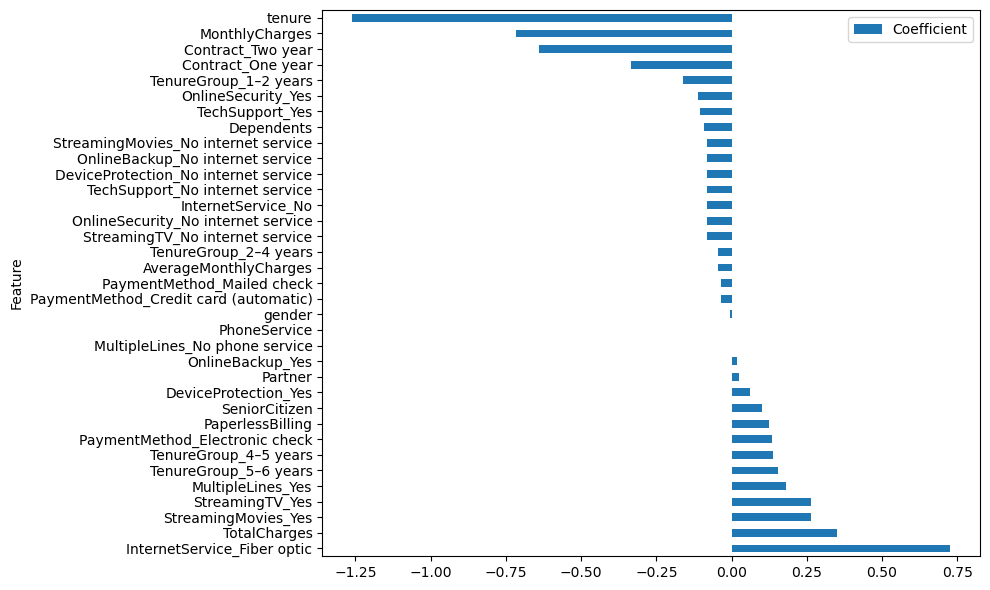

In [31]:
# Visualizing coefficients with a nbar chart
coeff_df.plot(x='Feature', y='Coefficient', kind='barh', figsize=(10,6))
plt.title = ('Logistic Regression Feature Importance')
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

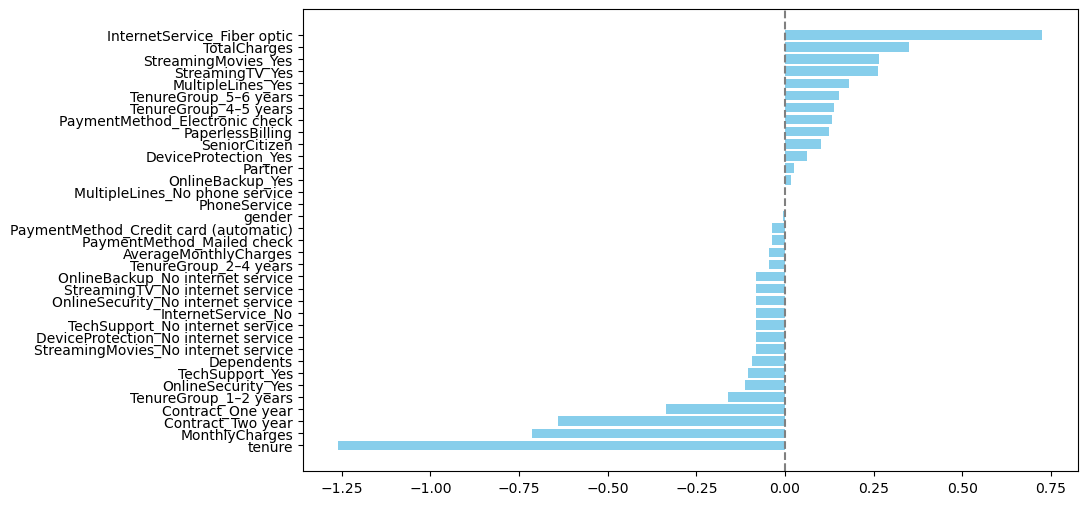

In [32]:
# Sort for better visualization
coeff_df_sorted = coeff_df.sort_values(by='Coefficient')

plt.figure(figsize=(10, 6))
plt.barh(coeff_df_sorted['Feature'], coeff_df_sorted['Coefficient'], color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')  # Reference line at 0
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [33]:
# evaluation of model on hold out test set
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = logistic_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:,1]))

Confusion Matrix:
 [[732 301]
 [ 76 298]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

ROC AUC Score: 0.8298580014598465


TypeError: 'str' object is not callable

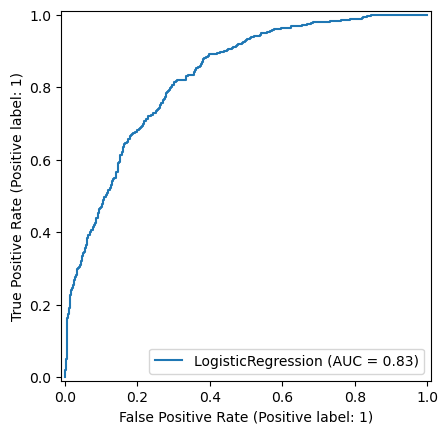

In [34]:
# Visualization 
from sklearn.metrics import RocCurveDisplay

# ROC Curve
RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()